<b> Churn rate</b> is a measure of the number of customers or employees who leave a company during a given period. It can also refer to the amount of revenue lost as a result of the departures. Changes in a business's churn rate can provide valuable insight into an organization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
telco_bas=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
telco_bas.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_bas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
telco_bas.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<b><p>talking about describe:</p></b>
    - 0.75% customers have tenure less than 55 months<br>
    - Average monthly charges are 64.76 USD whereas 25% of customers pay more than 89.85 USD

<AxesSubplot:xlabel='Churn', ylabel='count'>

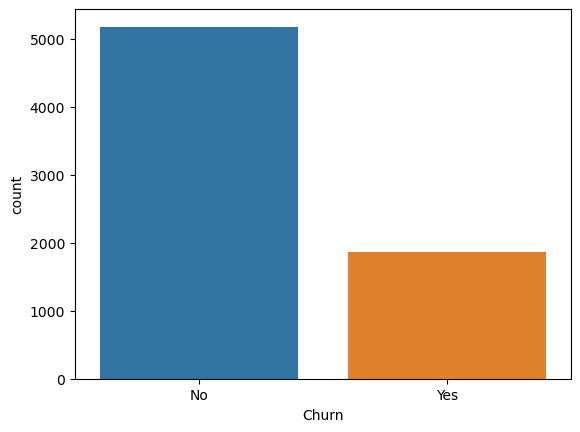

In [6]:
sns.countplot(x=telco_bas["Churn"])

In [7]:
ratio=100*(telco_bas.value_counts("Churn"))/len(telco_bas["Churn"])
ratio

Churn
No     73.463013
Yes    26.536987
dtype: float64

- data is highly imabalanced= 73%
- so we analyze the data with other features while taking the target values seperately to get some insights

In [8]:
missing_value=pd.DataFrame(100*(telco_bas.isnull().sum())/telco_bas.shape[0]).reset_index()
missing_value

,index,0
0,customerID,0.0
1,gender,0.0
2,SeniorCitizen,0.0
3,Partner,0.0
4,Dependents,0.0
5,tenure,0.0
6,PhoneService,0.0
7,MultipleLines,0.0
8,InternetService,0.0
9,OnlineSecurity,0.0


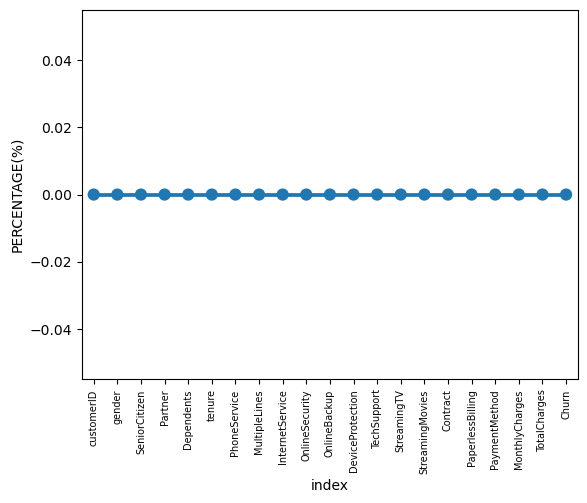

In [9]:
sns.pointplot(x="index",y=0,data=missing_value)
plt.xticks(rotation=90,fontsize=7)
plt.ylabel("PERCENTAGE(%)")
plt.show()


## data cleaning
##### create a copy of base data for manupulation and data processing

In [10]:
telco=telco_bas.copy()

In [11]:
telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

##### Total charge should be numeric. let's convert it

In [12]:
telco.TotalCharges=pd.to_numeric(telco.TotalCharges,errors="coerce")
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
telco[telco.isnull()["TotalCharges"]] #== telco.loc[telco.isnull()["TotalCharges"]==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
telco_bas.iloc[6754,:]

customerID                         2775-SEFEE
gender                                   Male
SeniorCitizen                               0
Partner                                    No
Dependents                                Yes
tenure                                      0
PhoneService                              Yes
MultipleLines                             Yes
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                              Yes
DeviceProtection                           No
TechSupport                               Yes
StreamingTV                                No
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                           61.9
TotalCharges                                 
Churn                                      No
Name: 6754, dtype: object

since 11 records compared to total dataset is very low (11<<7043). it is safe to ignore them from further processing

In [15]:
telco.dropna(how="any",inplace=True)
telco.shape

(7032, 21)

we can cut months to years ==> 1-12 months > 0-1 years and so on

In [16]:
max_tenure=telco.tenure.max()
max_tenure

72

In [17]:
labels=["{}-{}".format(i,i+11) for i in range(1,max_tenure,12)]
labels

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']

In [18]:
telco["tenure_group"]=pd.cut(x=telco.tenure,bins=range(0,max_tenure+2,12),labels=labels)

In [19]:
telco.tenure_group.value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [20]:
telco.drop(["customerID","tenure"],axis=1,inplace=True)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## DATA EXPLORATION

#### univariate analysis

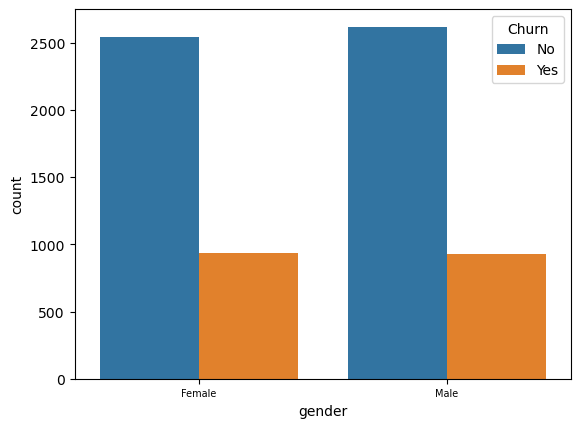

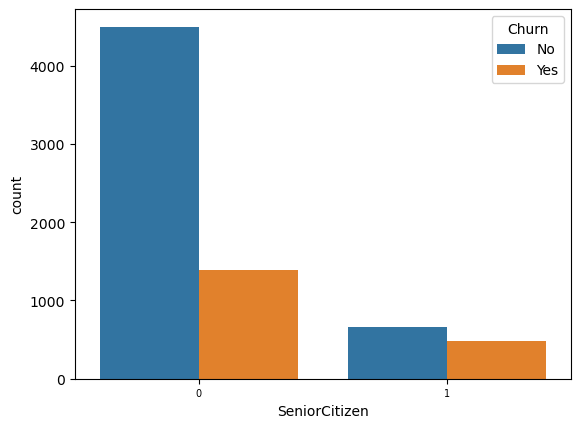

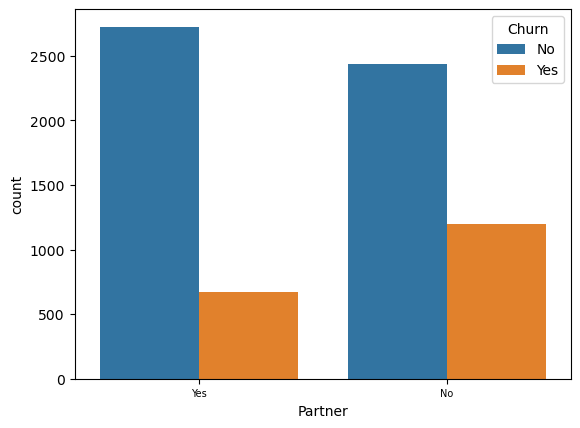

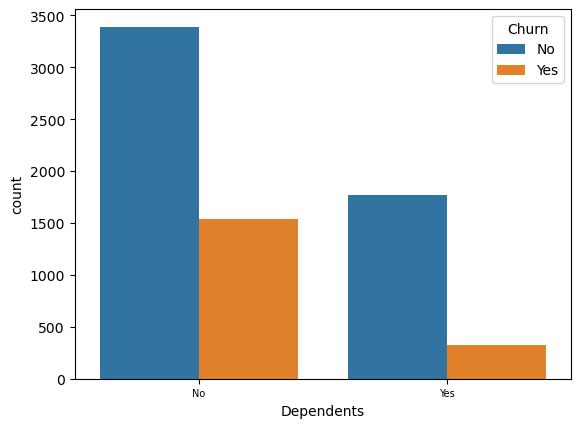

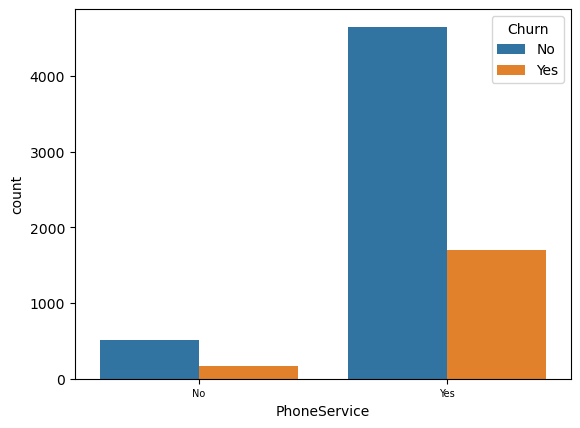

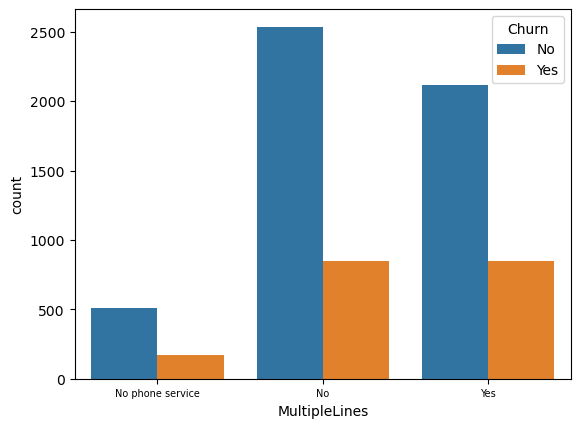

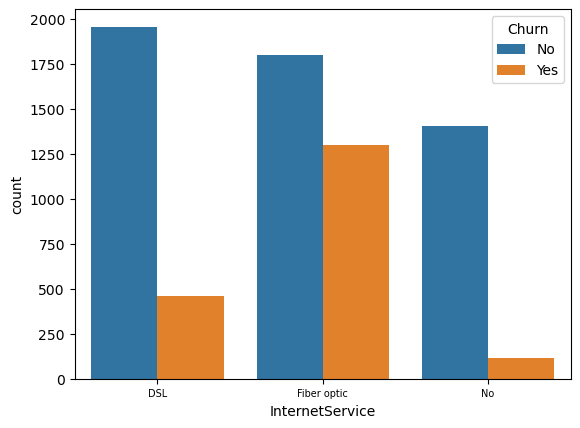

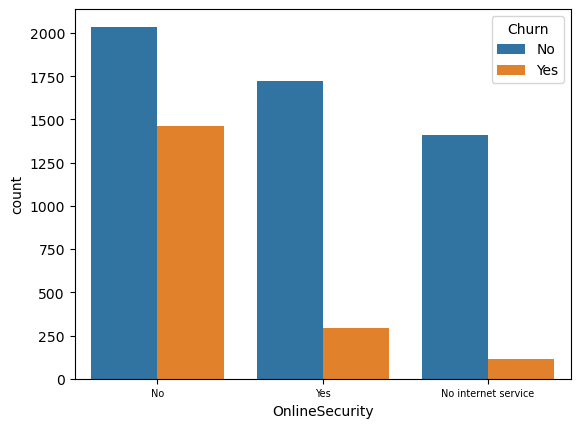

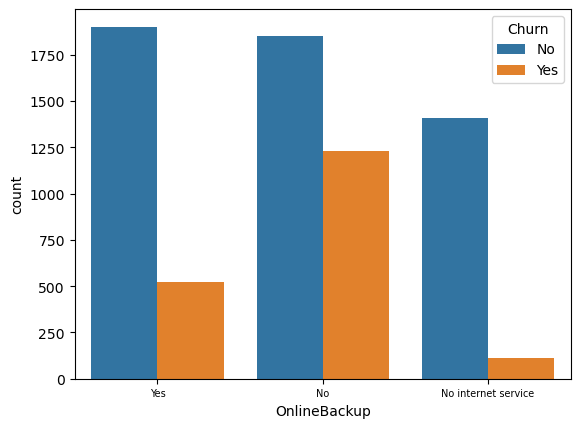

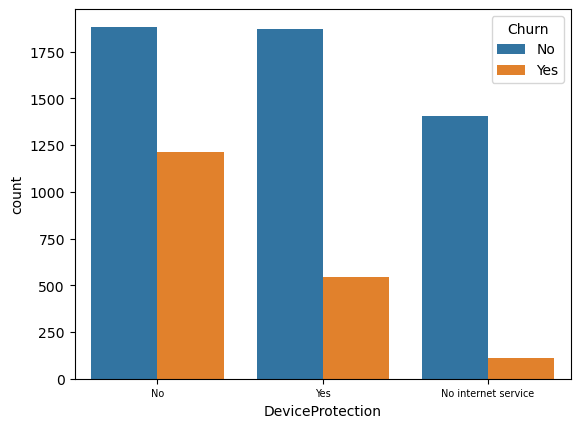

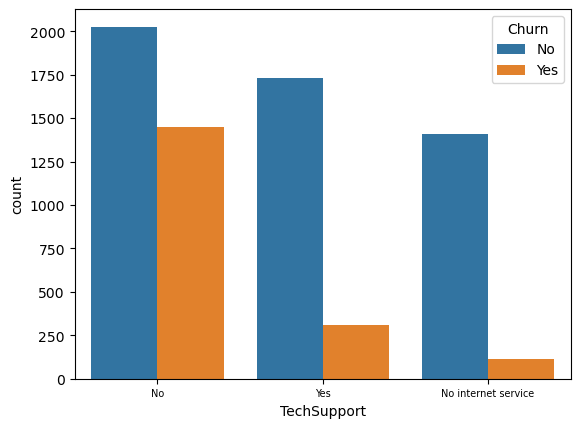

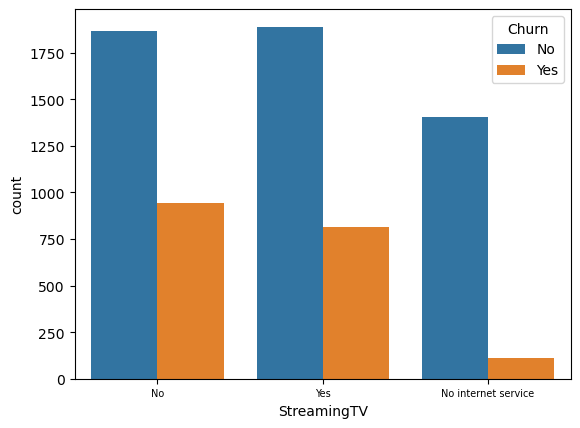

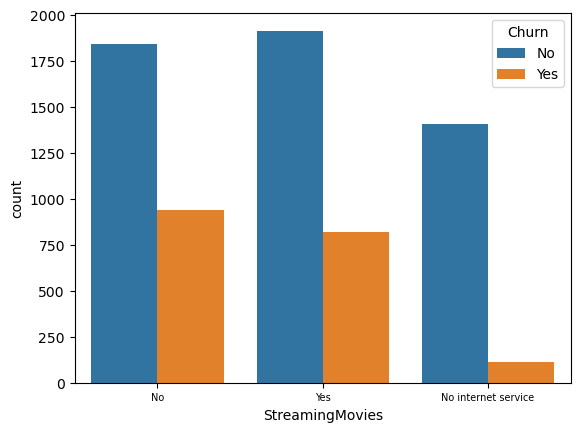

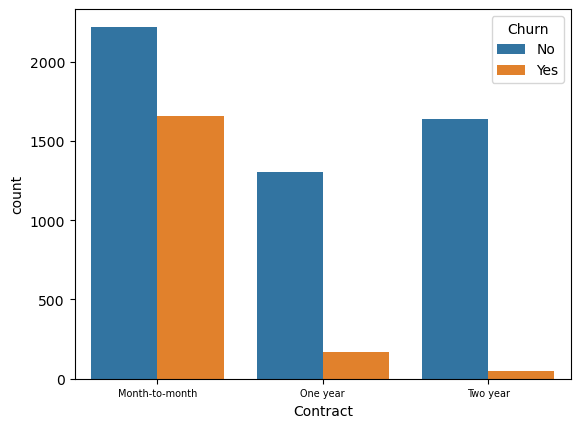

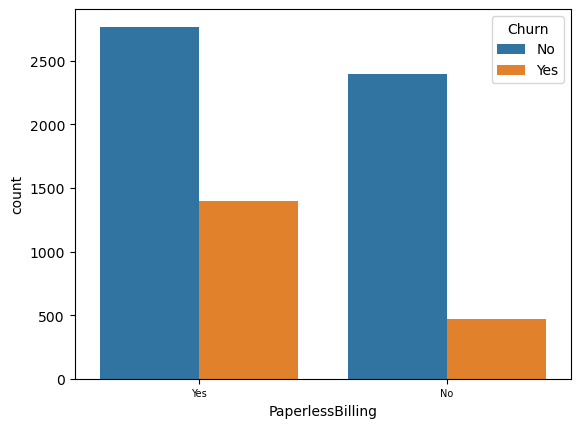

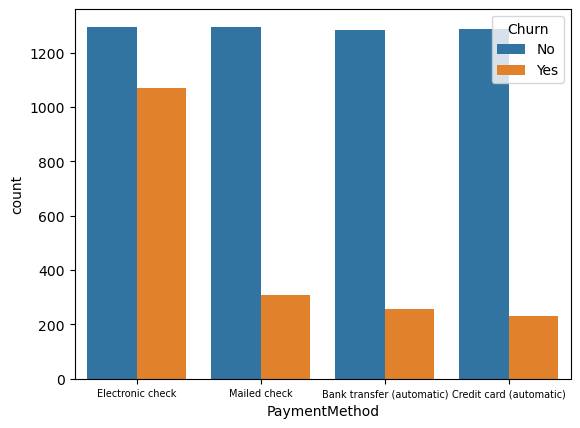

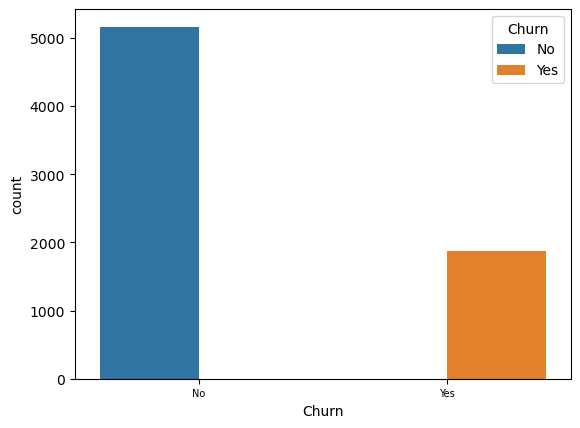

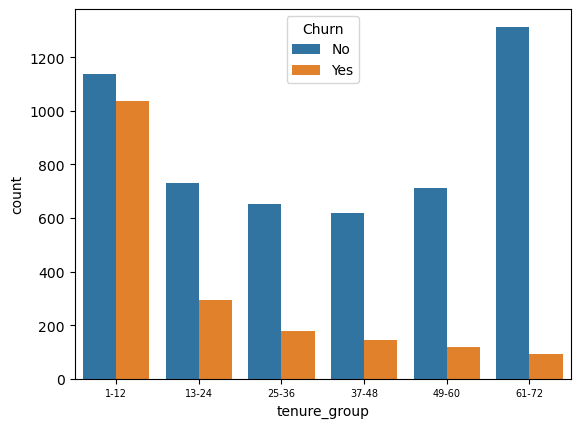

In [21]:
for i , data in enumerate(telco.columns[telco.dtypes!="float"]):
    plt.figure(i)
    sns.countplot(x=telco[data],hue=telco["Churn"])
    plt.xticks(fontsize=7)

convert the target variable churn in a numerical yes=1 , no=0

In [22]:
telco["Churn"]=np.where(telco.Churn=="Yes",1,0)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


convert all categorical columns to numerical

In [23]:
df=pd.get_dummies(telco)
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


#### relation between monthly charges and total charges

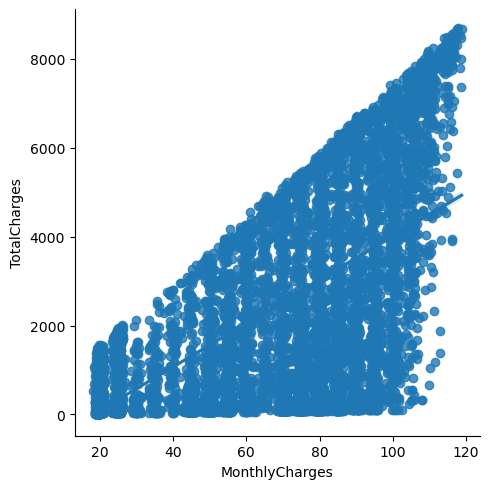

In [24]:
sns.lmplot(x="MonthlyCharges",y="TotalCharges",data=df)

both increase with each other as expected!

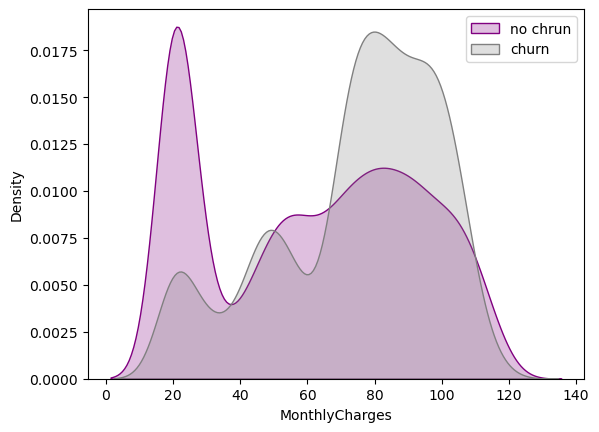

In [25]:
sns.kdeplot(df.MonthlyCharges[df.Churn==0],color="purple",fill=True)
sns.kdeplot(df.MonthlyCharges[df.Churn==1],color="gray",fill=True)
plt.legend(["no chrun","churn"])
plt.show()

churn is high when monthly charges are high

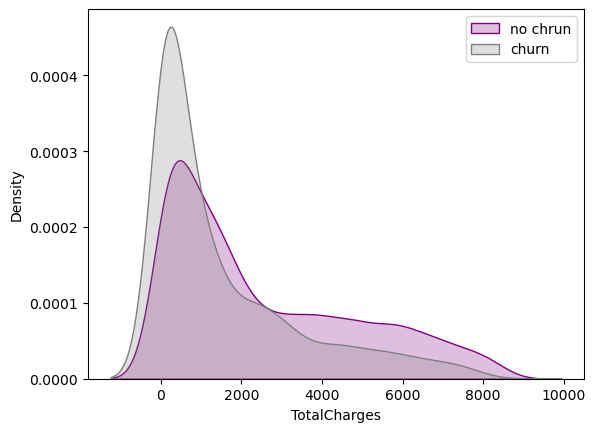

In [26]:
sns.kdeplot(df.TotalCharges[df.Churn==0],color="purple",fill=True)
sns.kdeplot(df.TotalCharges[df.Churn==1],color="gray",fill=True)
plt.legend(["no chrun","churn"])
plt.show()

as higher churn at lower total charges
Higher monthly charges,lower tenure and lower total charges are linked to high churn

<AxesSubplot:>

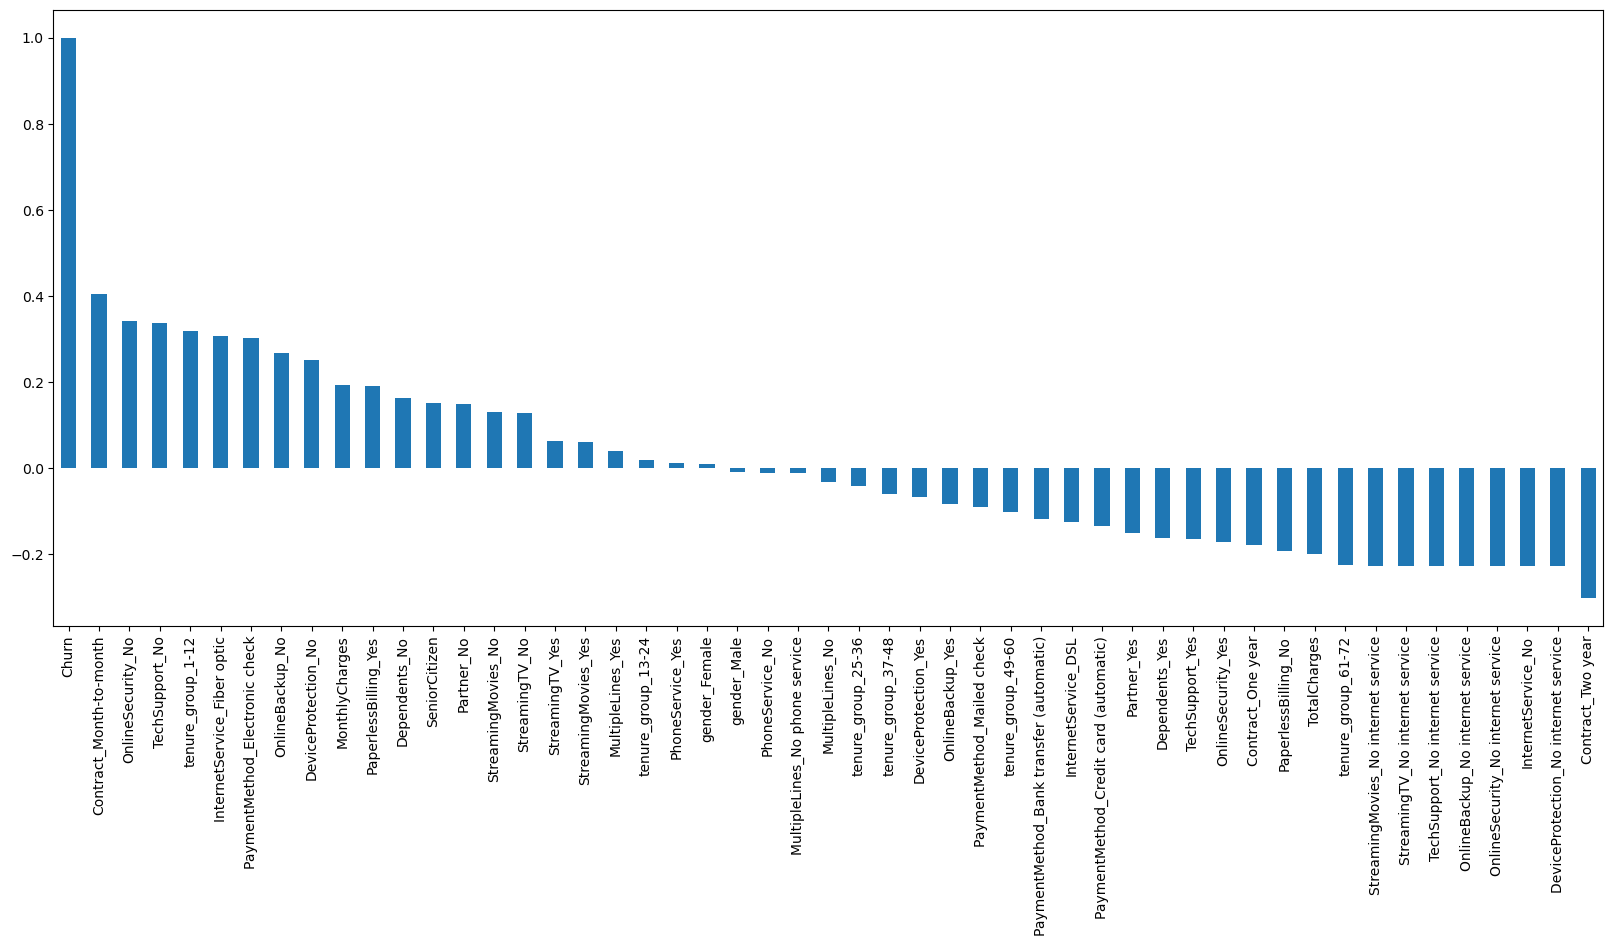

In [27]:
plt.figure(figsize=(20,8))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

In [28]:
df.corr()["Churn"].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1-12                          0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

<b>High churn</b> seen in case of   
Contract_Month-to-month        
OnlineSecurity_No                           
TechSupport_No                                
tenure_group_1-12                          
InternetService_Fiber optic                   
PaymentMethod_Electronic check   
<b>Low churn</b>    
subscription without no internet service  
the customer engaged for +5 years  

<AxesSubplot:>

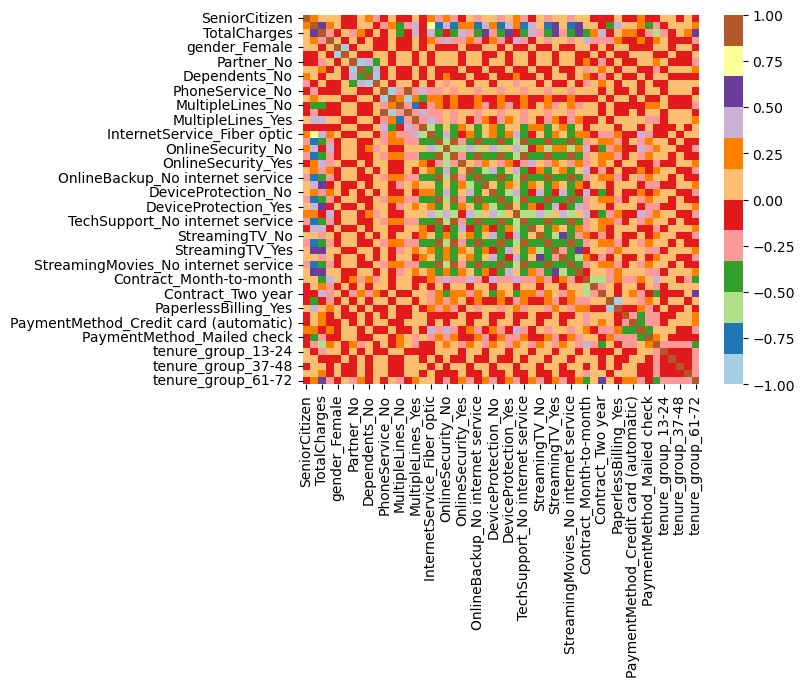

In [29]:
sns.heatmap(df.corr(),cmap="Paired")

## bivaraite analysis

In [30]:
def plot(x,data,hue,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 10
    plt.rcParams['axes.titlesize'] = 10
    plt.rcParams['axes.titlepad'] = 10
    plt.xticks(rotation=45)
    sns.countplot(x=x,data=data,hue=hue)
    plt.title(title)
    plt.show()

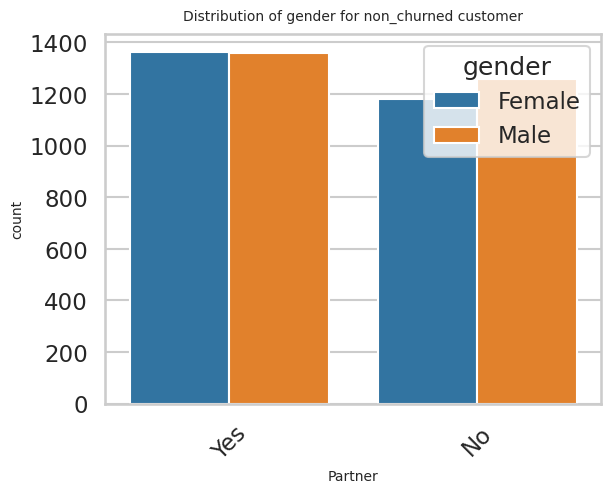

In [31]:
churn_0=telco[telco.Churn==0]
churn_1=telco[telco.Churn==1]
plot("Partner",churn_0,"gender","Distribution of gender for non_churned customer") 

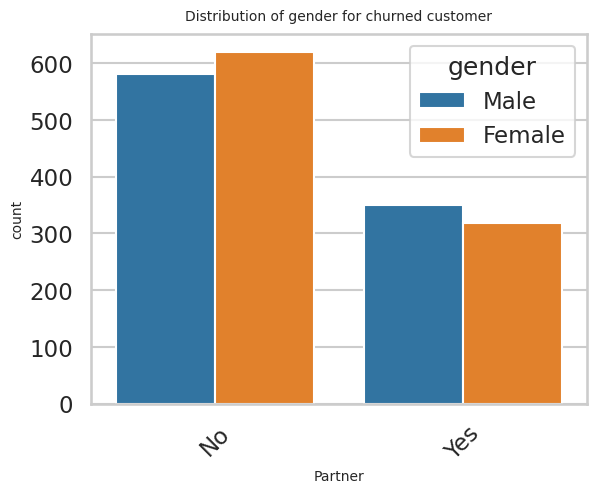

In [32]:
plot("Partner",churn_1,"gender","Distribution of gender for churned customer") 

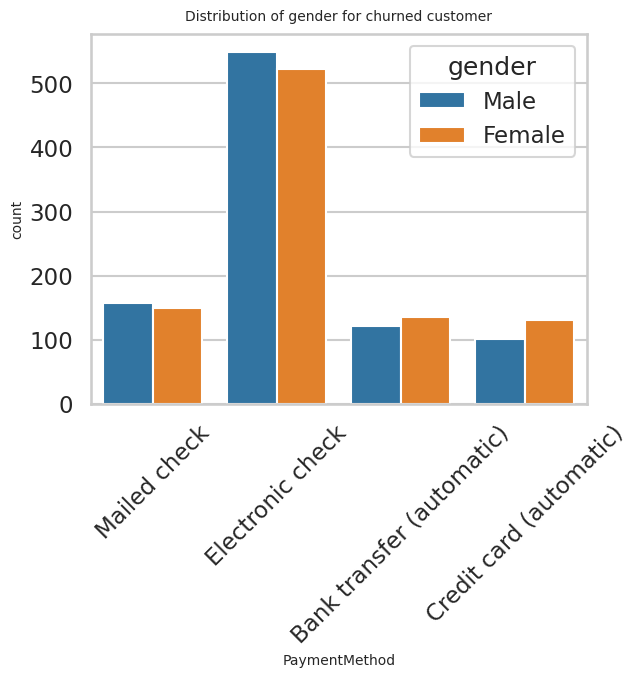

In [33]:
plot("PaymentMethod",churn_1,"gender","Distribution of gender for churned customer") 

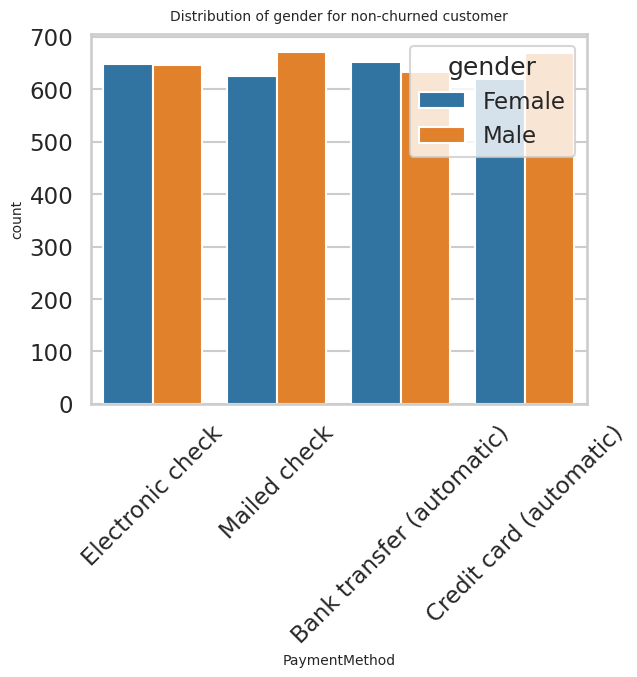

In [34]:
plot("PaymentMethod",churn_0,"gender","Distribution of gender for non-churned customer") 

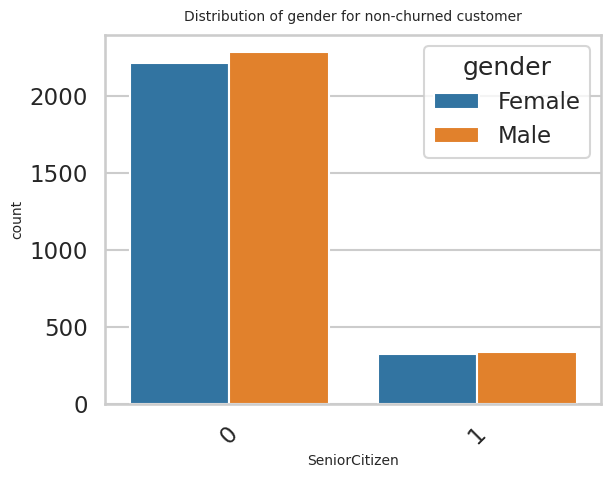

In [35]:
 plot("SeniorCitizen",churn_0,"gender","Distribution of gender for non-churned customer") 

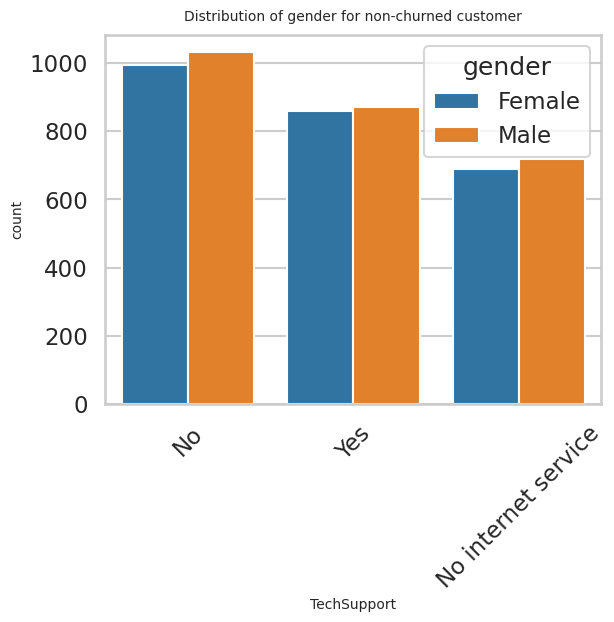

In [36]:
 plot("TechSupport",churn_0,"gender","Distribution of gender for non-churned customer") 

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

## build a model

In [37]:
df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,84.80,1990.50,0,0,1,0,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7039,0,103.20,7362.90,0,1,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7040,0,29.60,346.45,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
7041,1,74.40,306.60,1,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0


In [38]:
x=df.drop('Churn',axis=1)
x.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [39]:
y=df["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
(x_train.shape,x_test.shape)

((5625, 50), (1407, 50))

In [41]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [42]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [43]:
y_pred=model_dt.predict(x_test)

In [44]:
model_dt.score(x_test,y_test)

0.8009950248756219

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1056
           1       0.63      0.50      0.56       351

    accuracy                           0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[950, 106],
       [174, 177]])

In [47]:
b=classification_report(y_test,y_pred,output_dict=True)
b=pd.DataFrame(b).T
b["precision"]
b["precision"][0]
b

,precision,recall,f1-score,support
0,0.845196,0.899621,0.871560,1056.000000
1,0.625442,0.504274,0.558360,351.000000
accuracy,0.800995,0.800995,0.800995,0.800995
macro avg,0.735319,0.701947,0.714960,1407.000000
weighted avg,0.790374,0.800995,0.793427,1407.000000


In [48]:
from imblearn.combine import SMOTEENN

<strong>Imbalanced Classification in Python: SMOTE-ENN Method

In [49]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)
(X_resampled.shape,x.shape)

((5861, 50), (7032, 50))

In [50]:
test_balance=X_resampled
test_balance["Churn"]=y_resampled
test_balance.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72,Churn
0,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,56.15,3487.95,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,105.50,2686.05,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,113.25,7895.15,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0


In [51]:
ratio=100*(test_balance.value_counts("Churn"))/len(test_balance["Churn"])
ratio

Churn
1    54.93943
0    45.06057
dtype: float64

<AxesSubplot:xlabel='Churn', ylabel='count'>

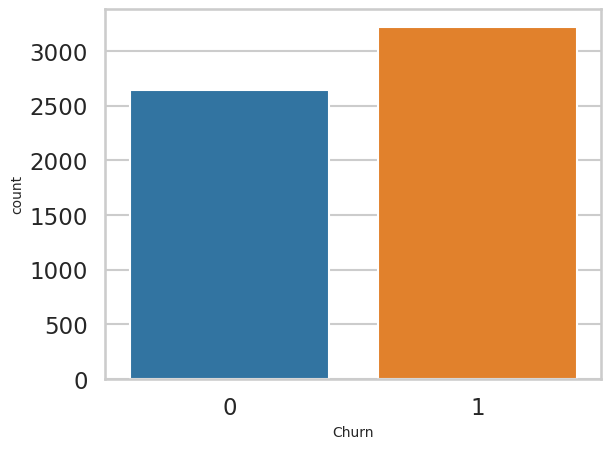

In [52]:
sns.countplot(x=test_balance["Churn"])

ohhh it's okey

In [53]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [54]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [55]:
def class_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test):
    from sklearn.model_selection import cross_val_score
    from statsmodels.stats.diagnostic import normal_ad
    from sklearn import metrics
    p_value_thresh=0.05
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()
    class_report=classification_report(y_test,y_pred,output_dict=True)
    cl=pd.DataFrame(class_report).T
    precision_0=cl["precision"][0]
    precision_1=cl["precision"][1]
    recall_0=cl["recall"][0]
    recall_1=cl["recall"][1]
    print(cl)
    print('R2:', round(R2,4))
    print("Cross Validated R2: ", round(cv_score.mean(),4) )
    cm=confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot=True)
    return R2 ,CV_R2,precision_0,precision_1,recall_0,recall_1
    
  


## DECISION TREE CLASSIFIER 

              precision    recall  f1-score      support
0              0.968872  0.887701  0.926512   561.000000
1              0.905830  0.974277  0.938807   622.000000
accuracy       0.933221  0.933221  0.933221     0.933221
macro avg      0.937351  0.930989  0.932659  1183.000000
weighted avg   0.935725  0.933221  0.932976  1183.000000
R2: 0.9332
Cross Validated R2:  0.9427


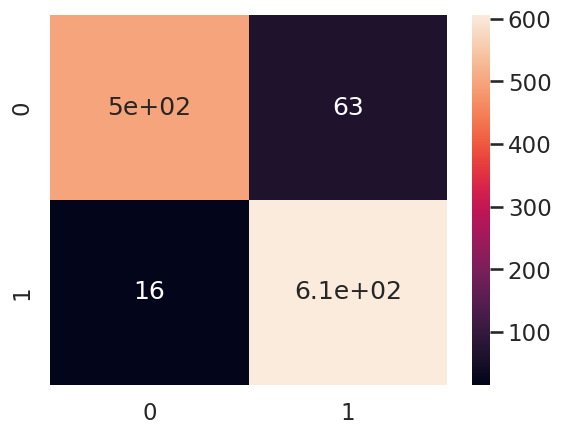

In [56]:
dtc=class_Models_Evaluation_Metrics(model_dt,xr_train,yr_train,xr_test,yr_test)

In [57]:
dtc_score = pd.DataFrame(data = dtc, index=['R2 Score','Cross Validated R2 Score','precision 0',"precision 1","recall 0","recall 1"])
dtc_score=dtc_score.T
dtc_score.insert(0, 'Model', 'Decision tree classifier')


In [58]:
dtc_score

,Model,R2 Score,Cross Validated R2 Score,precision 0,precision 1,recall 0,recall 1
0,Decision tree classifier,0.933221,0.942695,0.968872,0.90583,0.887701,0.974277


## Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

              precision    recall  f1-score      support
0              0.964356  0.868093  0.913696   561.000000
1              0.890855  0.971061  0.929231   622.000000
accuracy       0.922232  0.922232  0.922232     0.922232
macro avg      0.927606  0.919577  0.921463  1183.000000
weighted avg   0.925711  0.922232  0.921864  1183.000000
R2: 0.9222
Cross Validated R2:  0.9416


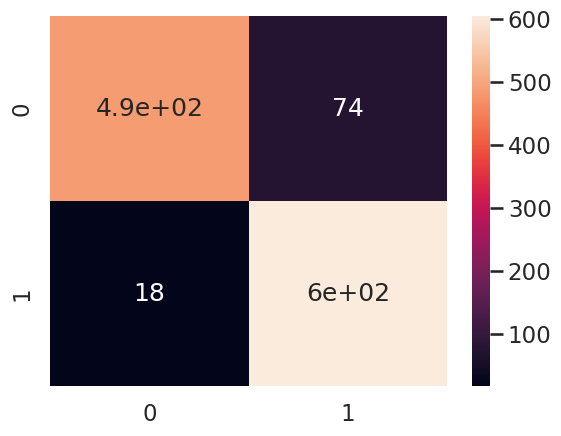

In [61]:
rfc=class_Models_Evaluation_Metrics(model_rf,xr_train,yr_train,xr_test,yr_test)

In [62]:
rfc_score = pd.DataFrame(data = rfc, index=['R2 Score','Cross Validated R2 Score','precision 0',"precision 1","recall 0","recall 1"])
rfc_score=rfc_score.T
rfc_score.insert(0, 'Model', 'Random Forest classifier')
rfc_score

,Model,R2 Score,Cross Validated R2 Score,precision 0,precision 1,recall 0,recall 1
0,Random Forest classifier,0.922232,0.941641,0.964356,0.890855,0.868093,0.971061


## comparison models

In [63]:
pd.concat([dtc_score,rfc_score],ignore_index=True)

,Model,R2 Score,Cross Validated R2 Score,precision 0,precision 1,recall 0,recall 1
0,Decision tree classifier,0.933221,0.942695,0.968872,0.905830,0.887701,0.974277
1,Random Forest classifier,0.922232,0.941641,0.964356,0.890855,0.868093,0.971061


there is no alot of difference !!

In [64]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
model.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [65]:
import pickle


In [66]:
model=pickle.dump(model,open("classModel.pkl","wb"))